<h1><center>Análisis de Sistemas de Infraestructura <br>
    Taller 1: Manejo y Visualización de Datos de Infraestructura </center></h1>

<h2> 3. Correlación entre GCI y conectividad.</h2>

<h3>Descargue los datos del Global Competitiveness Index (GCI) –filtre la información para construir una tabla con el valor de GCI por año para cada país, y genere un DataFrame –en
Python(Matlab)– con los valores más recientes de GCI para cada país. </h3>

 Importar las librerías que usaremos en el taller

importing Jupyter notebook from Parte2.ipynb
importing Jupyter notebook from Parte1.ipynb
Cuartil 3 año 2010 es 4.47
Cuartil 1 año 2010 es 2.25
El rango intercuartil año 2010 es 2.22
Limite de outliers superior año 2010 es 7.81
Limite de outliers inferior año 2010 es -1.08
Cuartil 3 año 2011 es 4.25
Cuartil 1 año 2011 es 2.55
El rango intercuartil año 2011 es 1.71
Limite de outliers superior año 2011 es 6.81
Limite de outliers inferior año 2011 es -0.01
Cuartil 3 año 2011 es 4.25
Cuartil 1 año 2011 es 2.55
El rango intercuartil año 2011 es 1.71
Limite de outliers superior año 2011 es 6.81
Limite de outliers inferior año 2011 es -0.01
Cuartil 3 año 2012 es 5.01
Cuartil 1 año 2012 es 3.03
El rango intercuartil año 2012 es 1.98
Limite de outliers superior año 2012 es 7.98
Limite de outliers inferior año 2012 es 0.06
Cuartil 3 año 2013 es 5.11
Cuartil 1 año 2013 es 3.27
El rango intercuartil año 2013 es 1.84
Limite de outliers superior año 2013 es 7.86
Limite de outliers inferior año 2013 

<string>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2021_x'} in the result is deprecated and will raise a MergeError in a future version.
C:\Users\Admin\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Admin\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


La mediana es 15982.0
Q3 es 95304.828
Q1 es 2172.5
La longitud de los datos es 147
El número de valores por encima del cuartil Q3 es 37
Probabilidad de que un dato esté en el cuartil superior 25.17
La matriz de covarianza es:
[[8.22102448e+03 5.98801978e+05 1.59747564e+06 1.02236648e+04
  5.93048681e+08 1.69122890e+07]
 [5.98801978e+05 3.74642984e+08 2.40307236e+08 7.30564824e+05
  2.93704536e+11 1.26423931e+10]
 [1.59747564e+06 2.40307236e+08 1.62215040e+09 2.05151694e+06
  1.57587983e+11 9.98668492e+09]
 [1.02236648e+04 7.30564824e+05 2.05151694e+06 1.39998442e+04
  7.66673360e+08 1.99752994e+07]
 [5.93048681e+08 2.93704536e+11 1.57587983e+11 7.66673360e+08
  5.56279412e+14 1.13385822e+13]
 [1.69122890e+07 1.26423931e+10 9.98668492e+09 1.99752994e+07
  1.13385822e+13 5.77375852e+11]]
[0.42496430430374943, 0.6707436301628357, 0.8161450132578838, 0.9060386047236056, 0.9762312730185638, 0.9999999999999999]
[0.4249643  0.24577933 0.14540138 0.08989359 0.07019267 0.02376873]


C:\Users\Admin\anaconda3\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


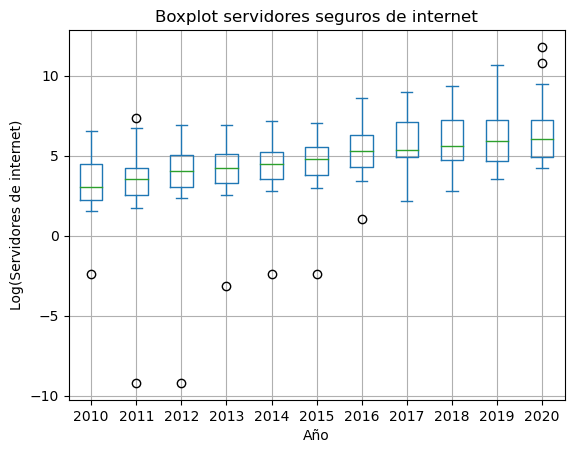

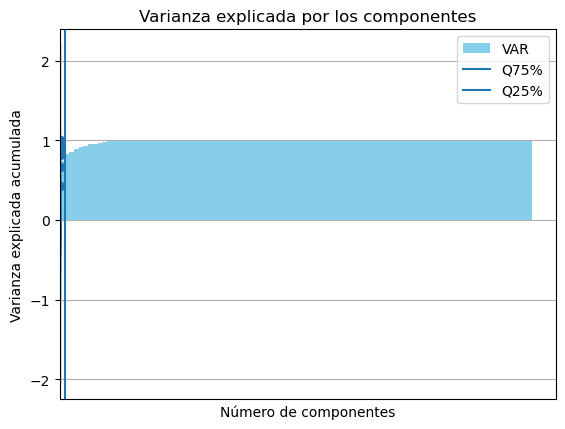

In [1]:
#Importar las librerías necesarias

import numpy as np #Libreria de operaciones matematicas y manejo de arrays numericos
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib as mpl #Libreria para visualizacion de datos
import seaborn as sns #Libreria basada en Matplotlib con herramientas graficas avanzadas
import scipy.stats as st #Libreria con funciones estadisticas
import math 
import matplotlib.pyplot as plt
import import_ipynb #Libreria para importar otros documentos ipynb
import Parte2 #Libreria de nuestro archivo segunda parte del taller, para poder importarla de esta forma ambos archivos tienen que estar en una misma ruta (misma carpeta) 
%matplotlib inline

<h3> Importar los datos </h3>

In [2]:
GCI= pd.read_excel(r'WEF_GCI_4.0_2019_Dataset.xlsx') #Cargar los datos 
GCI.drop(['Index','Series Global ID','Freeze date','Series name','Series units','Series order','Series code (if applicable)','Series type','Attribute'], axis=1, inplace=True) # Borramos las columnas con informacion no relevante 
GCI.set_index('Edition',inplace=True) #Se ponen los años como index
GCI=GCI.transpose() #Invertimos la matrix

#Verificación de que sea numérica toda la base de datos

for col in GCI:
    GCI[col] = pd.to_numeric(GCI[col], errors='coerce')
    
#Interpolar para tener en la columna de 2019 los datos últimos

GCI.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True)

#Toma la columna de datos 2019 

GCI_datos_ult=GCI.iloc[:, 0] 

CountryNameGCI=GCI_datos_ult.index #Los países como índices

GCI_datos_ult

Angola                  38.112486
Albania                 57.614169
United Arab Emirates    75.007388
Argentina               57.201329
Armenia                 61.276876
                          ...    
Venezuela               41.829061
Viet Nam                61.543467
Yemen                   35.503114
Zambia                  46.513941
Zimbabwe                44.243431
Name: 2019, Length: 140, dtype: float64

<h3>¿Qué países se encuentran entre los 20% más competitivos? ¿Que rango de valores GCI tiene los
países de ese grupo? Construya la CDF y SF.</h3>

In [3]:
GCI_datos_ult=GCI_datos_ult.sort_values( ascending=False) #Ordenar los valores
nv=len(GCI_datos_ult) #long de los datos
porc=nv*(20/100) #20% de la long de los datos
porc=math.floor(porc) #redondea primeros 'tantos' países
print('Nos solicitan los', porc, 'paises mas competitivos')

Paises_mas_comp=GCI_datos_ult[np.arange(porc)]
print('Los paises que se encuentran entre los 20% mas competitivos son:')
print(Paises_mas_comp)

Nos solicitan los 28 paises mas competitivos
Los paises que se encuentran entre los 20% mas competitivos son:
Singapore               84.783817
United States           83.673316
Hong Kong SAR           83.142025
Netherlands             82.392170
Switzerland             82.325118
Japan                   82.271218
Germany                 81.796537
Sweden                  81.247188
United Kingdom          81.203565
Denmark                 81.174898
Finland                 80.245630
Taiwan, China           80.241038
Korea, Rep.             79.619017
Canada                  79.591344
France                  78.806240
Australia               78.746626
Norway                  78.054864
Luxembourg              77.028126
New Zealand             76.747744
Israel                  76.743907
Austria                 76.609131
Belgium                 76.380122
Spain                   75.279405
Ireland                 75.116213
United Arab Emirates    75.007388
Iceland                 74.716626
Malays

C:\Users\Admin\AppData\Local\Temp\ipykernel_5768\947136263.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(GCI_datos_ult),


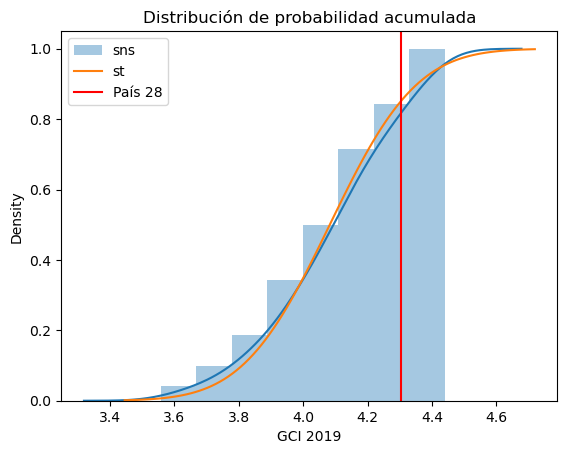

In [4]:
param=st.norm.fit(np.log(GCI_datos_ult))
x=np.linspace(param[0] - 3*param[1], param[0] + 3*param[1], 100)
cdf=st.norm.cdf(x, loc=param[0], scale=param[1])
sns.distplot(np.log(GCI_datos_ult),
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True), label="sns")
plt.plot(x,cdf,label="st")
plt.title("Distribución de probabilidad acumulada")
plt.xlabel('GCI 2019')
plt.axvline(np.log(73.901117), c='r', label='País 28')
plt.legend()

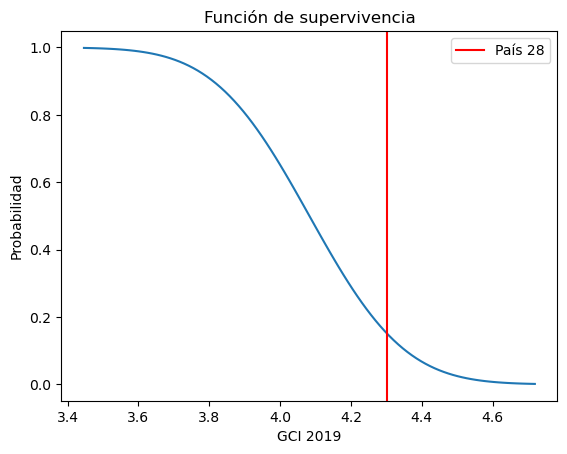

In [5]:
sf=st.norm.sf(x, loc=param[0], scale=param[1])
plt.plot(x,sf)
plt.title('Función de supervivencia')
plt.xlabel('GCI 2019')
plt.ylabel('Probabilidad')
plt.axvline(np.log(73.901117), c='r', label='País 28')
plt.legend()

<h3>Visualice el histograma de frecuencia relativa del GCI y contrastelo con el histograma del indice
de conectividad generado en este taller, encuentre las diferencias, analice y concluya. (Genere
visualizaciones independientes para cada histograma y una en la que aparezcan ambos superpuestos)</h3>

Text(0, 0.5, 'Frecuencia')

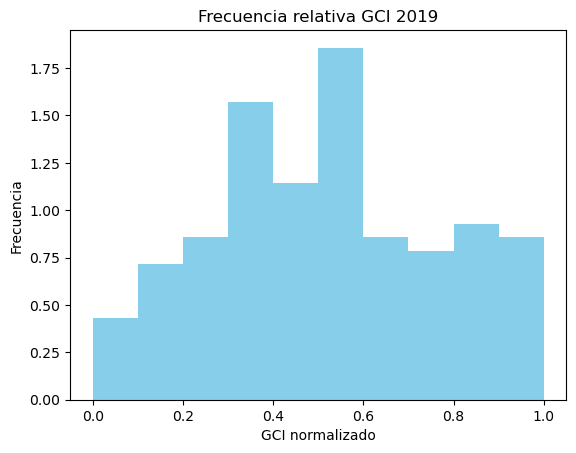

In [6]:
GCIserie=GCI[GCI.columns[0]];
GCIarray=(GCIserie.to_numpy()-np.min(GCIserie.to_numpy()))/(np.max(GCIserie.to_numpy(),axis=0)-np.min(GCIserie.to_numpy()));       #Normalizacion GCI
plt.hist(GCIarray,density=1, color = "skyblue"); #frecuencia relativa Indicador
plt.title('Frecuencia relativa GCI 2019')
plt.xlabel('GCI normalizado')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

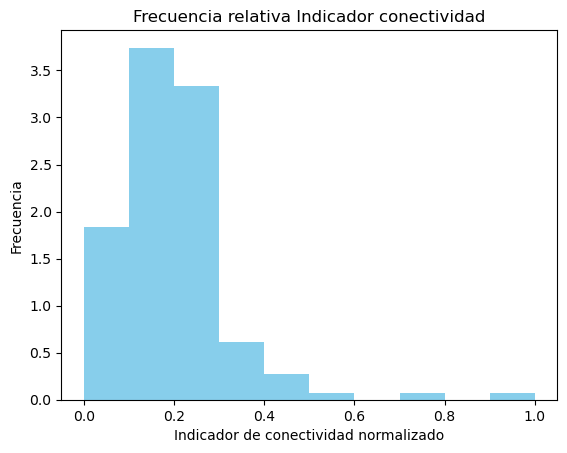

In [7]:
from Parte2 import Indicador_norm
Indicadorserie=Indicador_norm['Indicador de conectividad']
Hist_VAR=Indicadorserie.plot.hist(density=1, color = "skyblue") #frecuencia relativa Indicador
plt.title('Frecuencia relativa Indicador conectividad')
plt.xlabel('Indicador de conectividad normalizado')
plt.ylabel('Frecuencia')

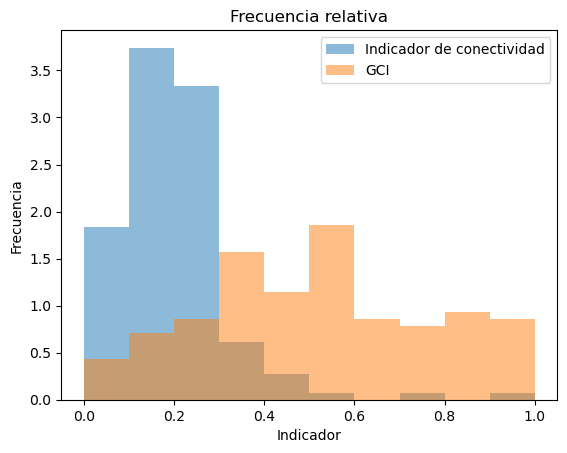

In [8]:
plt.hist(Indicadorserie,density=1,alpha=0.5,label='Indicador de conectividad');
plt.hist(GCIarray,density=1,alpha=0.5,label='GCI');
plt.title('Frecuencia relativa')
plt.xlabel('Indicador')
plt.ylabel('Frecuencia')
plt.legend(loc='best')
plt.show()

<h3>Realice el procedimiento de Feature Scaling (Normalización o estandarización) a los datos de GCI
y de conectividad.</h3>

El procedimiento se realizó en el item anterior para poder ver mejor los histogramas superpuestos

<h3>Genere una gráfica en la que se evidencie la correlación –si la hay– entre el indicador de conectividad y el GCI. Contraste con el valor de covarianza entre ambas variables y concluya.</h3>

In [9]:
from Parte2 import CountryName

Indicadorarray=np.array(Indicadorserie)
Indicador=pd.DataFrame(Indicadorarray, CountryName)
Indicador.columns = ['Indicador de conectividad']
Indicador.sort_values(ascending=False,by='Indicador de conectividad')

,Indicador de conectividad
Country Name,
United States,1.000000
China,0.761339
Denmark,0.580793
"Hong Kong SAR, China",0.485070
Singapore,0.417605
...,...
Madagascar,0.031435
Mozambique,0.018243
"Congo, Dem. Rep.",0.011729


In [10]:
GCI_datos=pd.DataFrame(GCIarray, columns=['GCI'])
GCI_datos['Country Name']=CountryNameGCI
GCI_datos.set_index('Country Name',inplace=True)
GCI_datos.sort_values(ascending=False,by='GCI')

,GCI
Country Name,
Singapore,1.000000
United States,0.977656
Hong Kong SAR,0.966965
Netherlands,0.951878
Switzerland,0.950528
...,...
Mozambique,0.060242
Haiti,0.025350
"Congo, Democratic Rep.",0.021227


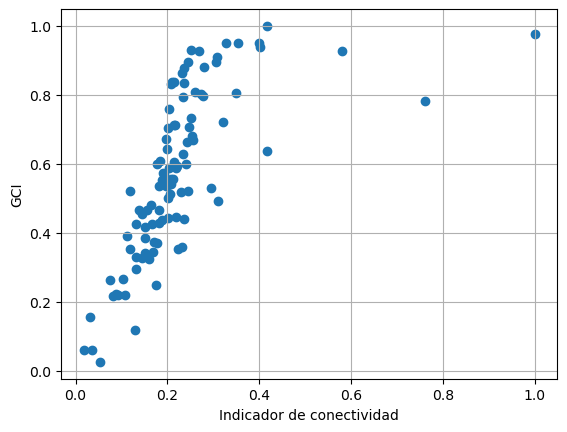

In [11]:
UnionIndicadores = pd.merge(Indicador,GCI_datos, on='Country Name', how='outer')
UnionIndicadores.dropna(how='any', inplace=True)
plt.scatter(UnionIndicadores['Indicador de conectividad'],UnionIndicadores['GCI'])
plt.xlabel("Indicador de conectividad") # Establecer el título del eje x
plt.ylabel("GCI") # Establecer el título del eje y
plt.grid()

In [12]:
np.cov(UnionIndicadores['Indicador de conectividad'],UnionIndicadores['GCI'])

array([[0.01654718, 0.02024027],
       [0.02024027, 0.05579128]])

In [13]:
np.corrcoef(UnionIndicadores['Indicador de conectividad'],UnionIndicadores['GCI'])

array([[1.        , 0.66614856],
       [0.66614856, 1.        ]])